## Import Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tqdm.notebook import tqdm
from datetime import datetime

## Exploratory of Data

In [112]:
articles = pd.read_csv('./articles.csv')
customers = pd.read_csv('./customers.csv')
transactions = pd.read_csv('./transactions_train.csv')

In [113]:
display(articles.head())
display(customers.head())
display(transactions.head())

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0000,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0000,1.0000,ACTIVE,Regularly,52.0000,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2


In [114]:
display(articles.describe())
display(customers.describe())
display(transactions.describe())

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,105542.0000,105542.0000,105542.0000,105542.0000,105542.0000,105542.0000,105542.0000,105542.0000,105542.0000,105542.0000,105542.0000
mean,698424569.0969,698424.5634,234.8619,1009515.0757,32.2338,3.2062,7.8080,4532.7778,3.1715,42.6642,1010.4383
std,128462381.3362,128462.3844,75.0493,22413.5858,28.0862,1.5638,5.3767,2712.6920,4.3532,23.2601,6.7310
min,108775015.0000,108775.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,1201.0000,1.0000,2.0000,1001.0000
25%,616992501.0000,616992.5000,252.0000,1010008.0000,9.0000,2.0000,4.0000,1676.0000,1.0000,20.0000,1005.0000
50%,702213001.5000,702213.0000,259.0000,1010016.0000,14.0000,4.0000,5.0000,4222.0000,2.0000,46.0000,1009.0000
75%,796703001.7500,796703.0000,272.0000,1010016.0000,52.0000,4.0000,11.0000,7389.0000,4.0000,61.0000,1017.0000
max,959461001.0000,959461.0000,762.0000,1010029.0000,93.0000,7.0000,20.0000,9989.0000,26.0000,97.0000,1025.0000


,FN,Active,age
count,476930.0000,464404.0000,1356119.0000
mean,1.0000,1.0000,36.3870
std,0.0000,0.0000,14.3136
min,1.0000,1.0000,16.0000
25%,1.0000,1.0000,24.0000
50%,1.0000,1.0000,32.0000
75%,1.0000,1.0000,49.0000
max,1.0000,1.0000,99.0000


,article_id,price,sales_channel_id
count,31788324.0000,31788324.0000,31788324.0000
mean,696227219.1338,0.0278,1.7040
std,133448003.4873,0.0192,0.4565
min,108775015.0000,0.0000,1.0000
25%,632803008.0000,0.0158,1.0000
50%,714582003.0000,0.0254,2.0000
75%,786524001.0000,0.0339,2.0000
max,956217002.0000,0.5915,2.0000


In [115]:
display(articles.info())
display(customers.info())
display(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


None

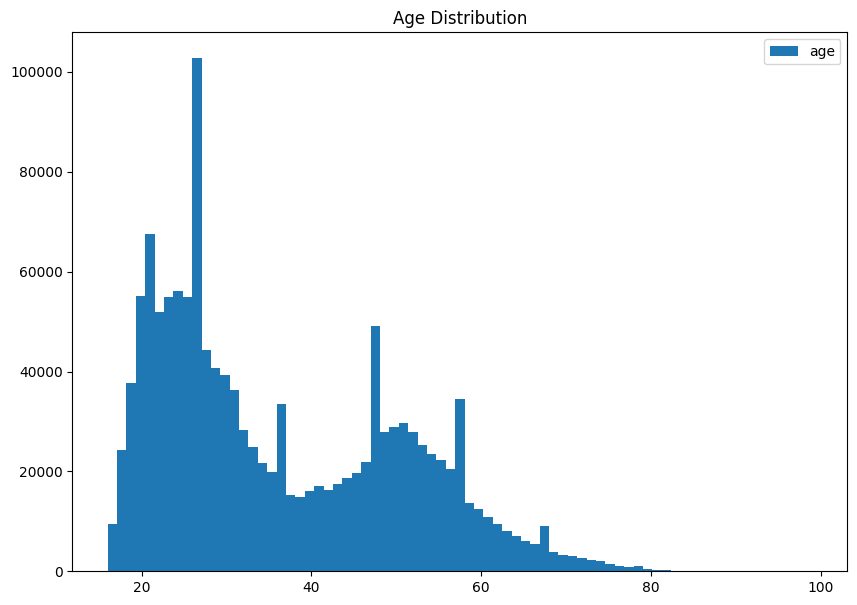

In [116]:
plt.figure(figsize=(10, 7))
plt.title('Age Distribution')
plt.hist(customers.age, label='age', bins=75)
plt.legend();

<AxesSubplot: >

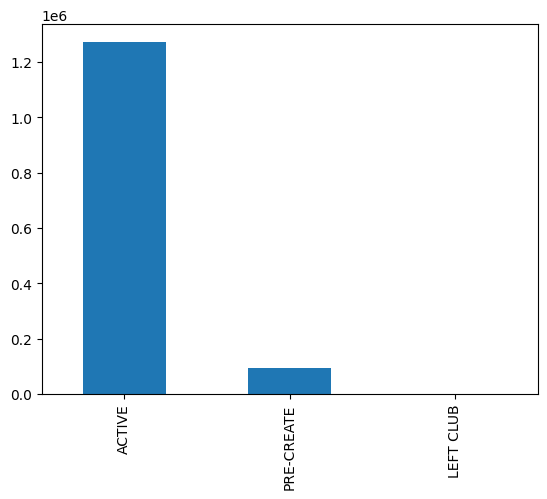

In [117]:
customers.club_member_status.value_counts().plot(kind='bar')

<AxesSubplot: >

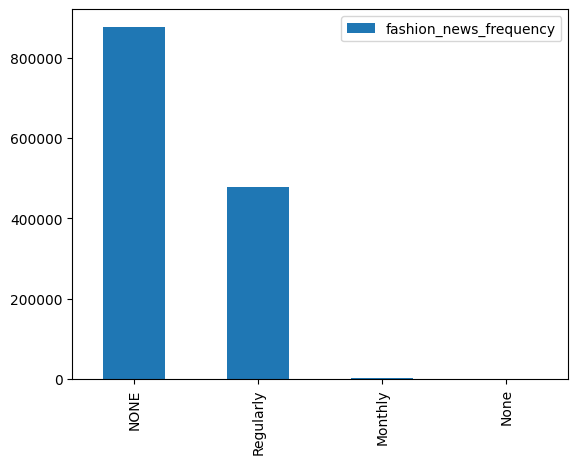

In [118]:
customers.fashion_news_frequency.value_counts().plot(kind='bar', legend=True)

<AxesSubplot: >

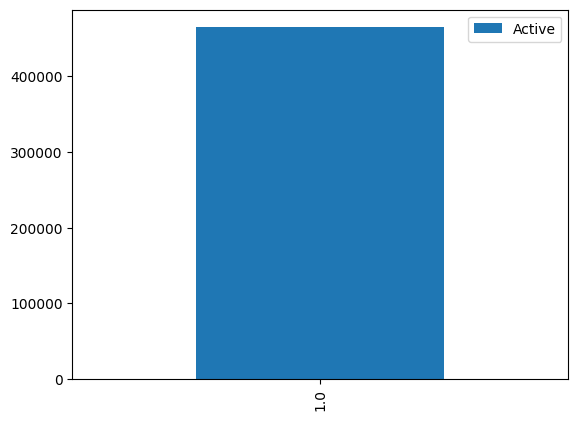

In [119]:
customers.Active.value_counts().plot(kind='bar', legend=True)

In [120]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

# 處理缺失值

In [121]:
customers.FN.loc[customers.FN.isna() == True] = 0.0
customers.Active.loc[customers.Active.isna() == True] = 0.0
customers.club_member_status.loc[customers.club_member_status.isna() == True] = 'NON-ACTIVE'
customers.fashion_news_frequency.loc[customers.fashion_news_frequency == 'None'] = 'NONE'

/var/folders/kx/716trnf928g_nvhl_lhb2yh80000gp/T/ipykernel_4234/1895849316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.FN.loc[customers.FN.isna() == True] = 0.0
/var/folders/kx/716trnf928g_nvhl_lhb2yh80000gp/T/ipykernel_4234/1895849316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.Active.loc[customers.Active.isna() == True] = 0.0
/var/folders/kx/716trnf928g_nvhl_lhb2yh80000gp/T/ipykernel_4234/1895849316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [122]:
display(customers.info())
display(customers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1371980 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


None

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0000,0.0000,ACTIVE,NONE,49.0000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0000,0.0000,ACTIVE,NONE,25.0000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0000,0.0000,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0000,0.0000,ACTIVE,NONE,54.0000,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0000,1.0000,ACTIVE,Regularly,52.0000,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


# Create RFM Dataset

In [123]:
pd.options.display.max_columns = 30
merged_articles_transactions = transactions.merge(articles, on='article_id', how='left')
display(merged_articles_transactions.head())

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2,541518,Rae Push (Melbourne) 2p,306,Bra,Underwear,1010016,Solid,51,Light Pink,1,Dusty Light,4,Pink,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2,505221,Inca Jumper,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,2,Medium Dusty,4,Pink,5963,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,7,Medium,4,Pink,3090,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,93,Dark Green,4,Dark,19,Green,3090,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...


In [124]:
merged_articles_transactions.shape

(31788324, 29)

In [125]:
agg_dict = {
    'price': 'sum'
}

real_transactions = merged_articles_transactions.groupby(['customer_id', 't_dat']).agg(agg_dict).reset_index()
real_transactions

,customer_id,t_dat,price
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2018-12-27,0.1101
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-05-02,0.0102
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-05-25,0.1017
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-07-25,0.0339
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-09-18,0.0441
...,...,...,...
9080174,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-04-05,0.0847
9080175,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-04-09,0.0567
9080176,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-04-25,0.0508
9080177,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-06-22,0.0169


In [126]:
per_customer_transaction = real_transactions.groupby(['customer_id']).size().reset_index()
per_customer_transaction.columns = ['customer_id', 'order_num']
per_customer_transaction

,customer_id,order_num
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,10
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,23
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,6
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,11
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,19
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,19
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,4


In [127]:
agg_dict = {
    't_dat': 'max',
    'price': 'sum'
}

real_transactions = real_transactions.groupby(['customer_id']).agg(agg_dict).reset_index()
real_transactions['order_num'] = per_customer_transaction['order_num']
real_transactions

,customer_id,t_dat,price,order_num
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2020-09-05,0.6490,10
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,2.6019,23
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,0.7048,7
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2019-06-09,0.0610,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2020-08-12,0.4697,6
...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,2020-09-06,1.2924,11
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,2020-08-18,1.8073,19
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,2020-09-09,0.7889,19
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-06-22,0.2092,4


In [128]:
rfm_df = real_transactions.copy()
rfm_df.columns = ['customer_id', 'recency', 'monetary', 'frequency']
rfm_df['recency'] = rfm_df['recency'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
today = datetime.strptime('2020-09-22', '%Y-%m-%d')
rfm_df['recency'] = (today - rfm_df['recency']).dt.days
rfm_df.head()

,customer_id,recency,monetary,frequency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,0.6490,10
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,2.6019,23
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,0.7048,7
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,0.0610,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,0.4697,6


In [129]:
rfm_df.shape

(1362281, 4)

In [130]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1, 5), range(1, 6)

rfm_df['r_score'] = pd.qcut(rfm_df.recency, q=5, labels=r_labels).astype(int)
rfm_df['f_score'] = pd.qcut(rfm_df.frequency, q=5, labels=f_labels, duplicates='drop').astype(int)
rfm_df['m_score'] = pd.qcut(rfm_df.monetary, q=5, labels=m_labels).astype(int)
rfm_df['rfm_sum'] = rfm_df.r_score + rfm_df.f_score + rfm_df.m_score

rfm_df.head()

,customer_id,recency,monetary,frequency,r_score,f_score,m_score,rfm_sum
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,0.6490,10,5,3,4,12
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,2.6019,23,4,4,5,13
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,0.7048,7,5,3,4,12
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,0.0610,1,1,1,1,3
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,0.4697,6,4,3,4,11


In [131]:
def assign_label(df, r_rule, f_rule, m_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1])) 
           & (df['f_score'].between(f_rule[0], f_rule[1]))
           & (df['f_score'].between(m_rule[0], m_rule[1])), colname] = label
    return df

# RFM Customer Segments
* **Champions** - bought recently, buy often and spend the most
* **Loyal Customers** - spend good money and often, responsive to promotions
* **Potential Loyalist** - recent customers, but spent a good amount and bought more than once
* **New Customers** - bought most recently, but not often
* **Promising** - recent shoppers, but haven’t spent much
* **Needing Attention** - above average recency, frequency and monetary values; may not have bought very recently though
* **About To Sleep** - below average recency, frequency and monetary values; will lose them if not reactivated
* **At Risk** - spent big money and purchased often but long time ago; need to bring them back
* **Can't Loose Them** - made biggest purchases, and often but haven’t returned for a long time
* **Hibernating** - last purchase was long back, low spenders and low number of orders

In [132]:
rfm_df['rfm_label'] = ''

rfm_df = assign_label(rfm_df, (5,5), (4,4), (4,5), 'champions')
rfm_df = assign_label(rfm_df, (3,4), (4,4), (4,5), 'loyal customers')
rfm_df = assign_label(rfm_df, (4,5), (2,3), (2,3), 'potential loyalist')
rfm_df = assign_label(rfm_df, (5,5), (1,1), (1,1), 'new customers')
rfm_df = assign_label(rfm_df, (4,4), (1,1), (1,1), 'promising')
rfm_df = assign_label(rfm_df, (3,3), (3,3), (3,3), 'needing attention')
rfm_df = assign_label(rfm_df, (3,3), (1,2), (1,2), 'about to sleep')
rfm_df = assign_label(rfm_df, (1,2), (3,4), (3,4), 'at risk')
rfm_df = assign_label(rfm_df, (1,2), (4,4), (5,5), 'cant loose them')
rfm_df = assign_label(rfm_df, (1,2), (1,2), (1,2), 'hibernating')

rfm_df.head(20)

,customer_id,recency,monetary,frequency,r_score,f_score,m_score,rfm_sum,rfm_label
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,0.6490,10,5,3,4,12,potential loyalist
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,2.6019,23,4,4,5,13,loyal customers
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,0.7048,7,5,3,4,12,potential loyalist
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,0.0610,1,1,1,1,3,hibernating
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,0.4697,6,4,3,4,11,potential loyalist
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,356,0.1016,1,2,1,2,5,hibernating
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,8,0.1660,3,5,2,3,10,potential loyalist
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,132,3.8236,16,3,4,5,12,loyal customers
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,261,0.0534,1,2,1,1,4,hibernating
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,680,0.0781,1,1,1,2,4,hibernating


<AxesSubplot: >

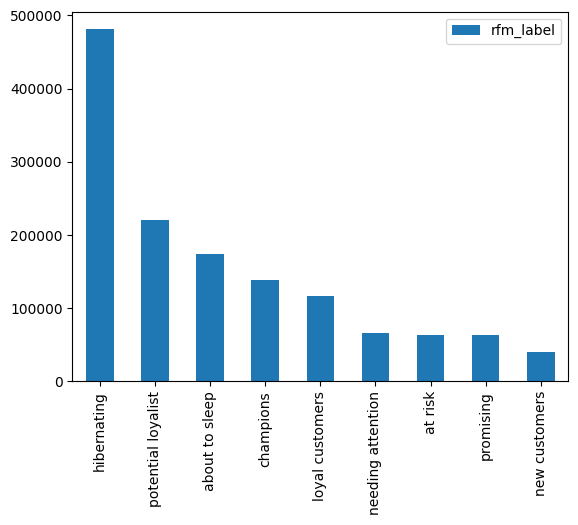

In [133]:
rfm_df.rfm_label.value_counts().plot(kind='bar', legend=True)

In [134]:
agg_dict = {
    'recency': 'size',
    'frequency': 'sum',
    'monetary': 'sum'
}

tmep_df = rfm_df.groupby(['rfm_label']).agg(agg_dict).reset_index()
tmep_df.columns = ['rfm_label', 'number_of_people', 'frequency', 'monetary']
tmep_df['per_buy'] = tmep_df.monetary / tmep_df.frequency
tmep_df['per_person'] = tmep_df.monetary / tmep_df.number_of_people
tmep_df

,rfm_label,number_of_people,frequency,monetary,per_buy,per_person
0,about to sleep,173716,336880,34047.5503,0.1011,0.1960
1,at risk,63721,503749,47830.5122,0.0949,0.7506
2,champions,138804,3451812,341548.4287,0.0989,2.4607
3,hibernating,481013,762828,72659.5944,0.0953,0.1511
4,loyal customers,116095,2089726,202154.3818,0.0967,1.7413
5,needing attention,65524,455429,46999.4234,0.1032,0.7173
6,new customers,40195,56348,5497.7601,0.0976,0.1368
7,potential loyalist,219848,1333623,125991.5242,0.0945,0.5731
8,promising,63365,89784,7916.7991,0.0882,0.1249


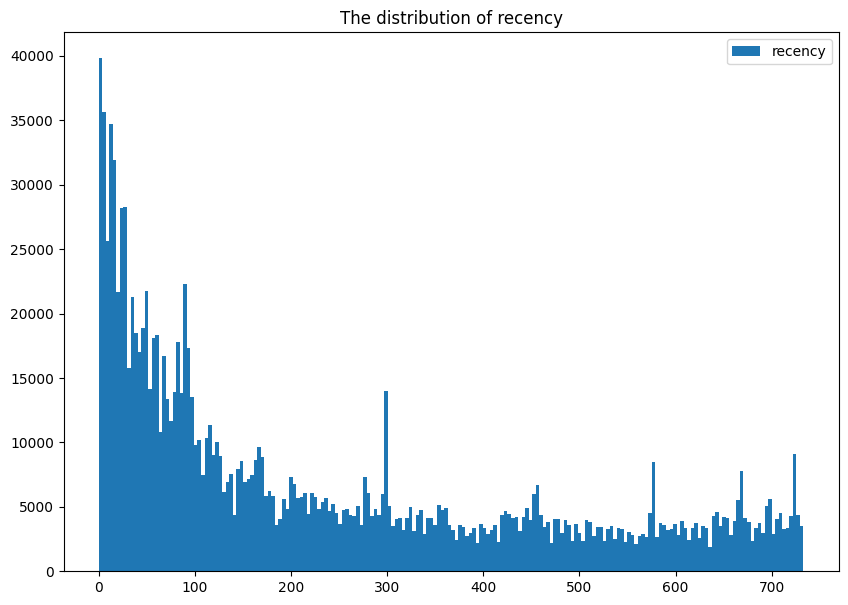

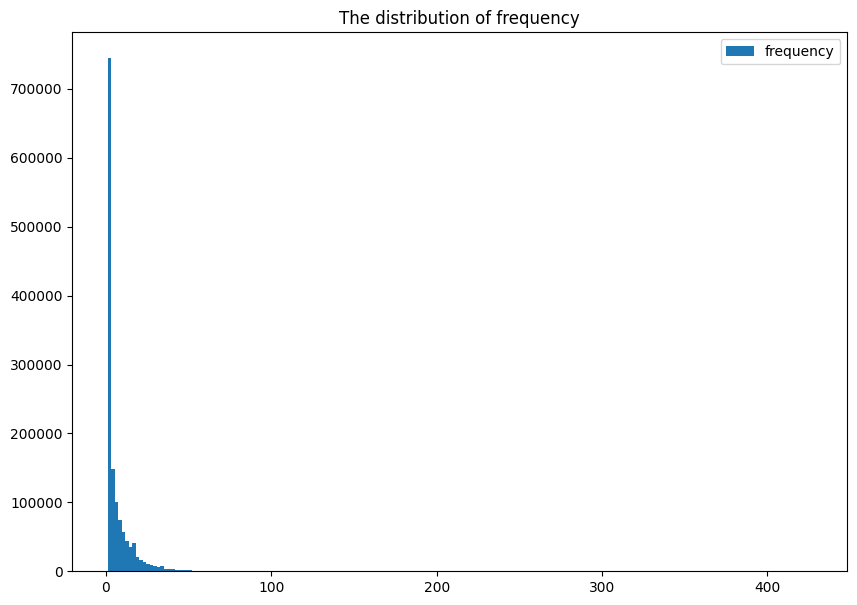

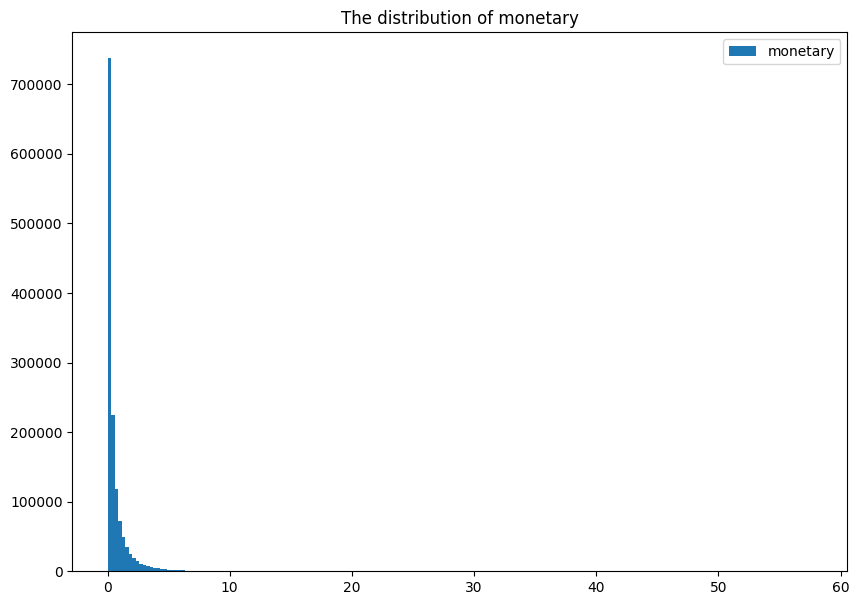

In [135]:
cols = ['recency', 'frequency', 'monetary']

for col in cols:

    plt.figure(figsize=(10,7))
    plt.title('The distribution of {}'.format(col))
    plt.hist(rfm_df[col], label=col, bins=200)
    plt.legend();

# 以 champions 作為目標族群

In [136]:
r_filter = rfm_df.r_score < 3
f_filter = rfm_df.f_score < 3
m_filter = 4 <= rfm_df.m_score
random_filter = rfm_df.rfm_label == 'champions'

# rfm_retain = rfm_df.loc[r_filter & f_filter & m_filter]
rfm_retain = rfm_df.loc[random_filter]
rfm_retain.head()

,customer_id,recency,monetary,frequency,r_score,f_score,m_score,rfm_sum,rfm_label
13,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,23,5.0076,25,5,4,5,14,champions
15,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,24,0.8644,11,5,4,4,13,champions
29,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,28,1.0560,21,5,4,5,14,champions
38,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,8,25.4669,144,5,4,5,14,champions
40,0001f8cef6b9702d54abf66fd89eb21014bf98567065a9...,20,0.7603,14,5,4,4,13,champions


# 在 transactions 資料中找到目標族群集中性
* **Product Group Name, Product Type Name**: (Garment Lower body, Trousers), (Garment Full body, Dress)
* **Index Group Name, Index Name**: (Ladieswear, Ladieswear)
* **Garment Group Name**: Jersey Fancy

In [137]:
customer_id_list = rfm_retain.customer_id.to_list()

retained_customer_df = merged_articles_transactions.loc[merged_articles_transactions.customer_id.isin(customer_id_list)]
retained_customer_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
12,2018-09-20,0008968c0d451dbc5a9968da03196fe20051965edde741...,531310002,0.0225,2,531310,Drew Cardigan,245,Cardigan,Garment Upper body,1010010,Melange,8,Dark Grey,4,Dark,12,Grey,1647,Tops Knitwear,D,Divided,2,Divided,53,Divided Collection,1003,Knitwear,"Long cardigan in a soft, fine knit containing ..."
13,2018-09-20,0008968c0d451dbc5a9968da03196fe20051965edde741...,529841001,0.0203,2,529841,Lauper Sweater,252,Sweater,Garment Upper body,1010010,Melange,7,Grey,2,Medium Dusty,12,Grey,1647,Tops Knitwear,D,Divided,2,Divided,53,Divided Collection,1003,Knitwear,Jumper in a marled knit containing some wool w...
45,2018-09-20,001ea4e9c54f7e9c88811260d954edc059d596147e1cf8...,652075001,0.0118,2,652075,Stork fancy,255,T-shirt,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1640,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Off-the-shoulder blouse in crinkled jersey wit...
46,2018-09-20,001ea4e9c54f7e9c88811260d954edc059d596147e1cf8...,670295001,0.0102,2,670295,CSP Hackney tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1640,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Cropped top in ribbed jersey with a V-neck at ...
57,2018-09-20,003ac6eff3ca20cbe4e14a106a5e28b7551616005de8f9...,617322003,0.0339,1,617322,HM+ Glans tunic,258,Blouse,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1919,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Long-sleeved tunic in jersey crêpe with a roun...


## 集中性之規則
* **Rule1:** 該屬性指標資料量必須超過總資料量的 10%
* **Rule2:** 若為連續性資料，則看分佈趨勢是否大致符合 Rule1

In [138]:
def check_intensivity(df: pd.DataFrame, col1: str, THRESHOLD1=0.1) -> pd.DataFrame:

    temp = df.groupby([col1]).size().reset_index(name='num')
    TOTAL = temp.num.sum()
    temp1 = temp[temp.num / TOTAL >= THRESHOLD1].reset_index(drop=True)
    temp1 = temp1.sort_values(by=['num'], ascending=False)
    
    return temp1


In [139]:
for col in retained_customer_df.columns.tolist():

    print('---'*5 + col + '---'*5)
    display(check_intensivity(retained_customer_df, col, 0.1))

    

---------------t_dat---------------


,t_dat,num


---------------customer_id---------------


,customer_id,num


---------------article_id---------------


,article_id,num


---------------price---------------


,price,num
0,0.0339,1271294


---------------sales_channel_id---------------


,sales_channel_id,num
1,2,8554147
0,1,3392432


---------------product_code---------------


,product_code,num


---------------prod_name---------------


,prod_name,num


---------------product_type_no---------------


,product_type_no,num
1,272,1599776
0,265,1337723


---------------product_type_name---------------


,product_type_name,num
1,Trousers,1599776
0,Dress,1337723


---------------product_group_name---------------


,product_group_name,num
2,Garment Upper body,4780943
1,Garment Lower body,2651935
0,Garment Full body,1450191


---------------graphical_appearance_no---------------


,graphical_appearance_no,num
1,1010016,6804016
0,1010001,1495748


---------------graphical_appearance_name---------------


,graphical_appearance_name,num
1,Solid,6804016
0,All over pattern,1495748


---------------colour_group_code---------------


,colour_group_code,num
0,9,4145692
1,10,1259868


---------------colour_group_name---------------


,colour_group_name,num
0,Black,4145692
1,White,1259868


---------------perceived_colour_value_id---------------


,perceived_colour_value_id,num
3,4,5780944
0,1,2103090
2,3,1702518
1,2,1454887


---------------perceived_colour_value_name---------------


,perceived_colour_value_name,num
0,Dark,5780944
1,Dusty Light,2103090
2,Light,1702518
3,Medium Dusty,1454887


---------------perceived_colour_master_id---------------


,perceived_colour_master_id,num
1,5,4117808
2,9,1599143
0,2,1470537


---------------perceived_colour_master_name---------------


,perceived_colour_master_name,num
0,Black,4117808
2,White,1599143
1,Blue,1470537


---------------department_no---------------


,department_no,num


---------------department_name---------------


,department_name,num


---------------index_code---------------


,index_code,num
0,A,5205187
2,D,2631709
1,B,1888181


---------------index_name---------------


,index_name,num
1,Ladieswear,5205187
0,Divided,2631709
2,Lingeries/Tights,1888181


---------------index_group_no---------------


,index_group_no,num
0,1,7812426
1,2,2631709


---------------index_group_name---------------


,index_group_name,num
1,Ladieswear,7812426
0,Divided,2631709


---------------section_no---------------


,section_no,num
0,15,2395914
1,53,1355205


---------------section_name---------------


,section_name,num
1,Womens Everyday Collection,2395914
0,Divided Collection,1355205


---------------garment_group_no---------------


,garment_group_no,num
1,1005,1923826
0,1002,1198618


---------------garment_group_name---------------


,garment_group_name,num
1,Jersey Fancy,1923826
0,Jersey Basic,1198618


---------------detail_desc---------------


,detail_desc,num


## 各項指標之分佈圖

<AxesSubplot: xlabel='product_group_name,product_type_name'>

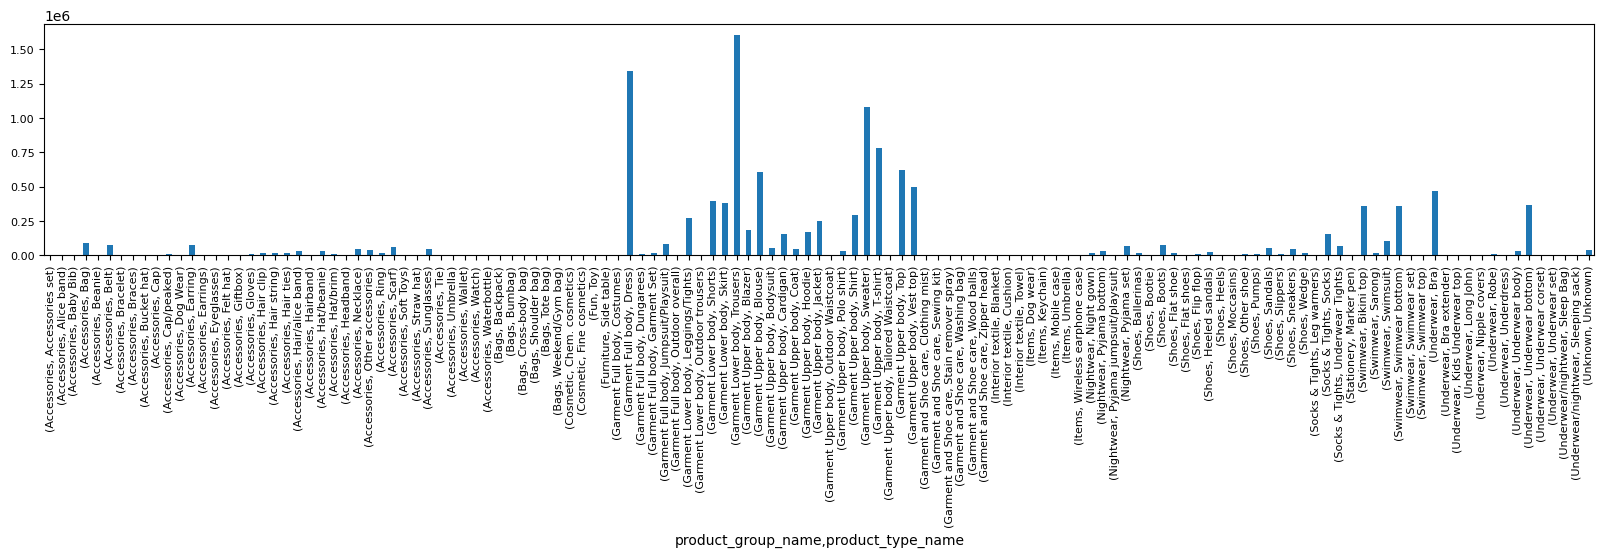

In [140]:
retained_customer_df.groupby(['product_group_name', 'product_type_name']).size().plot(kind='bar', fontsize=8, figsize=(20, 3))

<AxesSubplot: xlabel='index_group_name,index_name'>

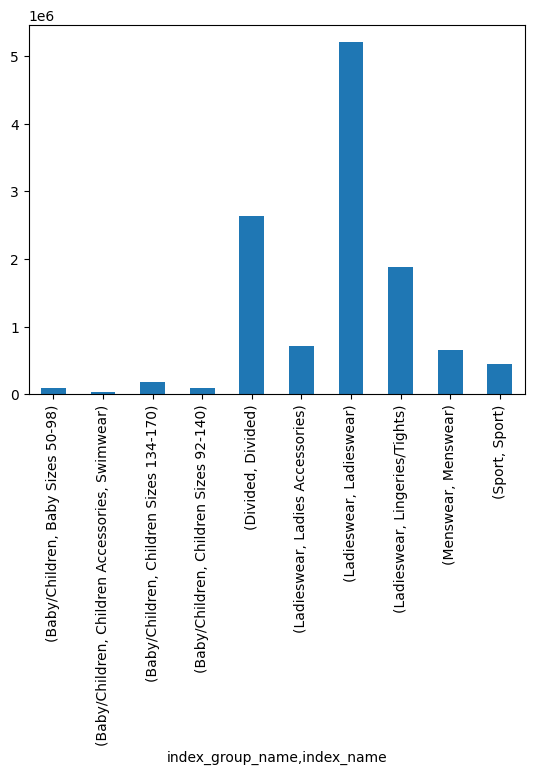

In [141]:
retained_customer_df.groupby(['index_group_name', 'index_name']).size().plot(kind='bar')

<AxesSubplot: xlabel='garment_group_name'>

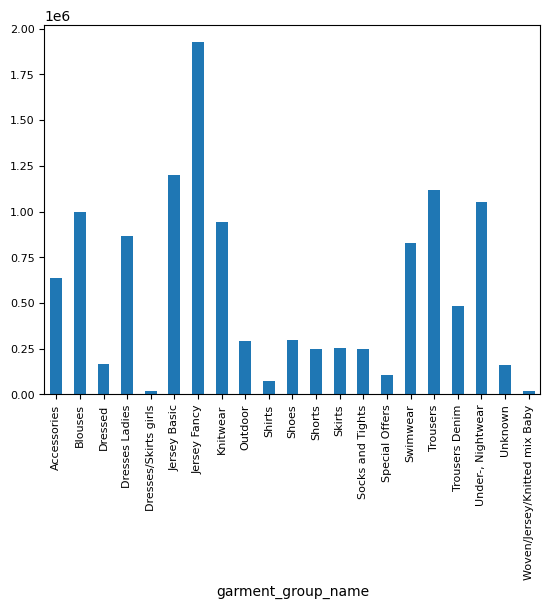

In [142]:
retained_customer_df.groupby(['garment_group_name']).count()['article_id'].plot(kind='bar', fontsize=8)

<AxesSubplot: >

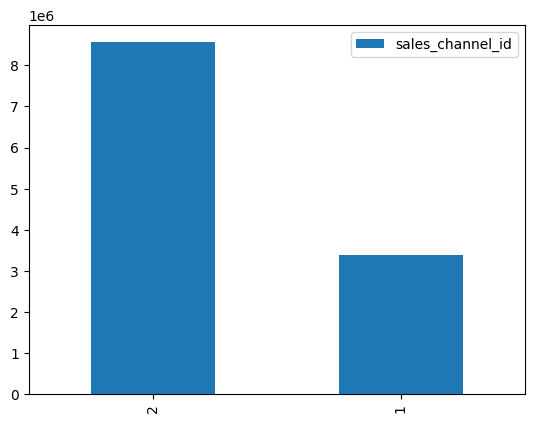

In [143]:
retained_customer_df.sales_channel_id.value_counts().plot(kind='bar', legend=True)

<AxesSubplot: xlabel='sales_channel_id'>

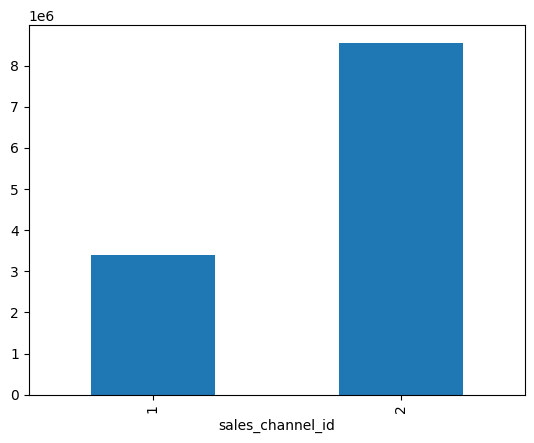

In [144]:
retained_customer_df.groupby(['sales_channel_id']).size().plot(kind='bar')

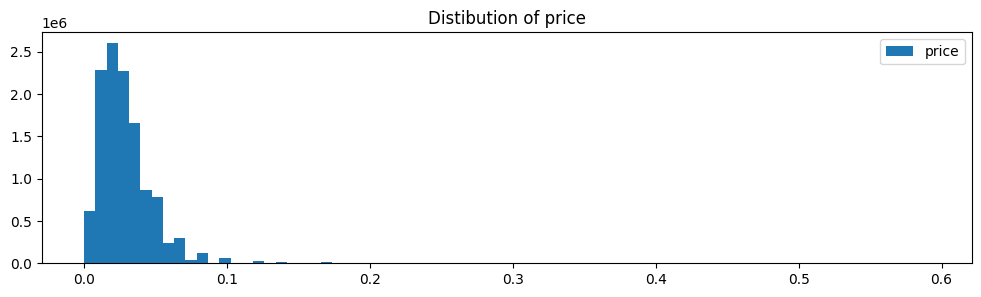

In [145]:
plt.figure(figsize=(12, 3))
plt.title('Distibution of price')
plt.hist(retained_customer_df.price, label='price', bins=75)
plt.legend();

<AxesSubplot: >

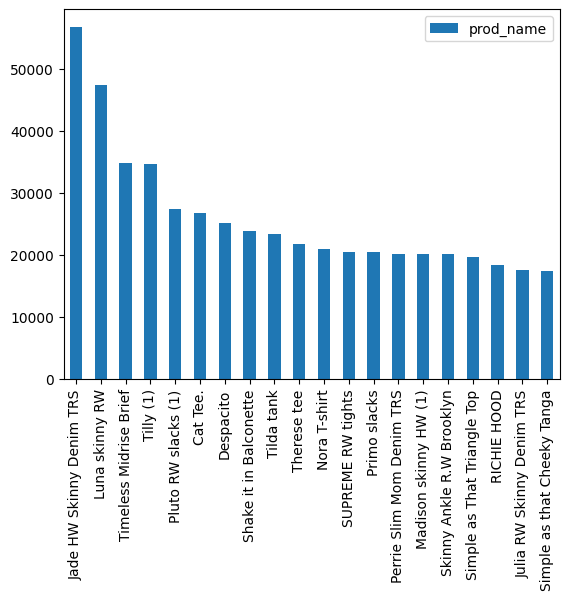

In [146]:
retained_customer_df.prod_name.value_counts()[:20].plot(kind='bar', legend=True)

/var/folders/kx/716trnf928g_nvhl_lhb2yh80000gp/T/ipykernel_4234/3117234048.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  article_id_list = retained_customer_df.article_id.value_counts()[:20].index.tolist()


[Errno 2] No such file or directory: './images/061/0610776002.jpg'
[Errno 2] No such file or directory: './images/061/0610776001.jpg'


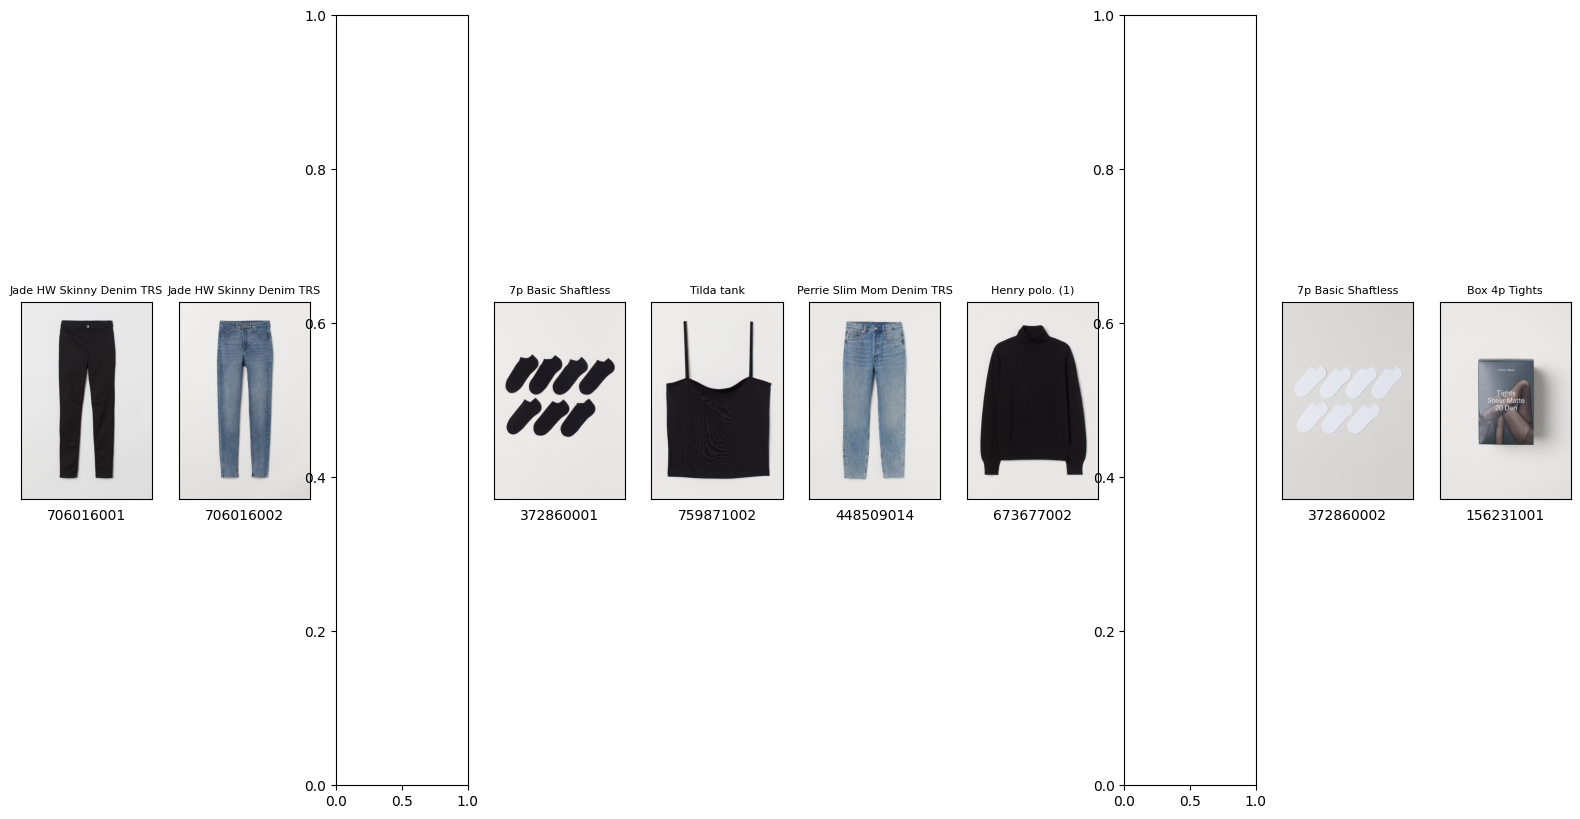

In [147]:
N = 10
article_id_list = retained_customer_df.article_id.value_counts()[:20].index.tolist()
f, ax = plt.subplots(1, N, figsize=(20, 10))

for i in range(N):

    try:
        article = articles[articles.article_id == article_id_list[i]]

        img = mpimg.imread(f'./images/0{str(article.article_id.values[0])[:2]}/0{str(article.article_id.values[0])}.jpg')
        ax[i].set_title(article.prod_name.values[0], fontsize=8)
        ax[i].set_xlabel(article.article_id.values[0], fontsize=10)
        ax[i].imshow(img)
        ax[i].set_xticks([], [])
        ax[i].set_yticks([], [])
    except FileNotFoundError as e:
        print(e)

plt.show()

# 在 customers 資料中找到目標族群集中性
* **Age** -> 23~26
* **Club Member Status** -> ACTIVE

In [148]:
filtered_customer = customers[customers.customer_id.isin(customer_id_list)]
filtered_customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
13,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0000,1.0000,ACTIVE,Regularly,56.0000,b31984b20a8c478de38eaf113c581ff64e63c4242e607b...
15,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,1.0000,1.0000,ACTIVE,Regularly,54.0000,ca8ca81e8b5794992144273b0eada83a7e09ec728c1093...
29,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,0.0000,0.0000,ACTIVE,NONE,24.0000,045064bd8b280587884bfe521be1496a3bb2ab227d5262...
38,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1.0000,1.0000,ACTIVE,Regularly,44.0000,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
40,0001f8cef6b9702d54abf66fd89eb21014bf98567065a9...,0.0000,0.0000,ACTIVE,NONE,21.0000,4211d6bf468de190b2f135feed96ed94b1c47f1d68991c...


## 各項指標之分佈圖

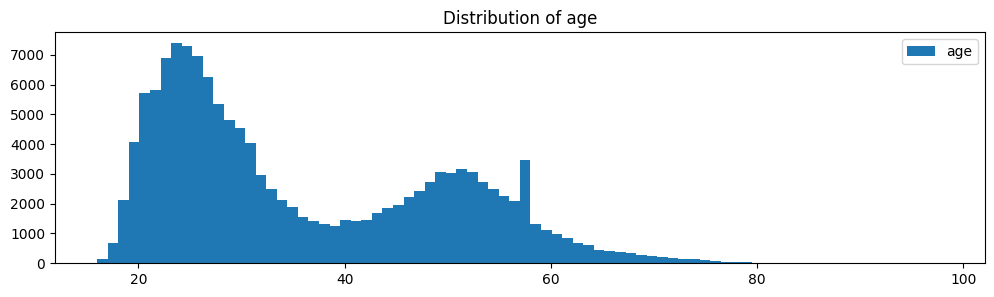

In [149]:
plt.figure(figsize=(12, 3))
plt.title('Distribution of age')
plt.hist(filtered_customer.age, label='age', bins=80)
plt.legend();

<AxesSubplot: >

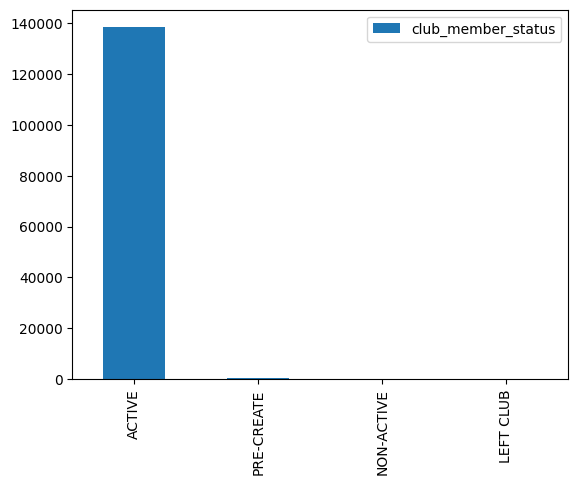

In [150]:
display(filtered_customer.club_member_status.value_counts().plot(kind='bar', legend=True))

<AxesSubplot: >

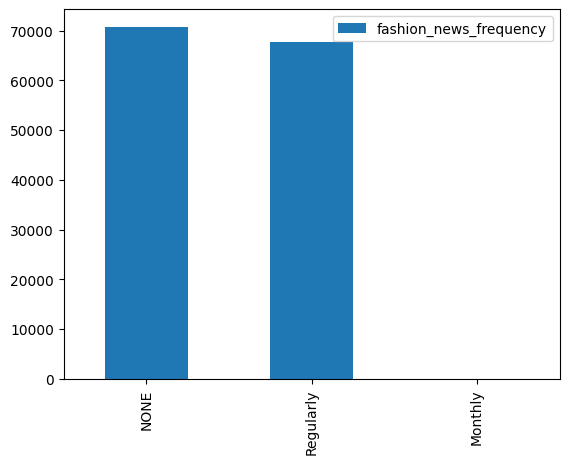

In [151]:
display(filtered_customer.fashion_news_frequency.value_counts().plot(kind='bar', legend=True))

<AxesSubplot: >

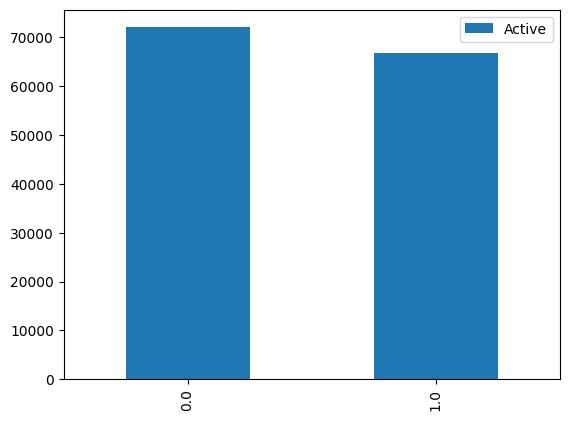

In [152]:
display(filtered_customer.Active.value_counts().plot(kind='bar', legend=True))

# 其他值得分析的問題
* 從 2020-05-12 開始，每日訂單數量以及訂單金額有非常大幅度的增長

In [153]:
merged1 = real_transactions.merge(customers, on='customer_id', how='left')
merged2 = merged_articles_transactions.merge(customers, on='customer_id', how='left')
display(merged1.head())
display(merged2.head())

,customer_id,t_dat,price,order_num,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2020-09-05,0.6490,10,0.0000,0.0000,ACTIVE,NONE,49.0000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,2.6019,23,0.0000,0.0000,ACTIVE,NONE,25.0000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,0.7048,7,0.0000,0.0000,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2019-06-09,0.0610,1,0.0000,0.0000,ACTIVE,NONE,54.0000,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2020-08-12,0.4697,6,1.0000,1.0000,ACTIVE,Regularly,52.0000,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",0.0000,0.0000,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2,541518,Rae Push (Melbourne) 2p,306,Bra,Underwear,1010016,Solid,51,Light Pink,1,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",0.0000,0.0000,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2,505221,Inca Jumper,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,2,...,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,1.0000,1.0000,ACTIVE,Regularly,32.0000,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,7,...,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,1.0000,1.0000,ACTIVE,Regularly,32.0000,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,93,Dark Green,4,...,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,1.0000,1.0000,ACTIVE,Regularly,32.0000,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


<AxesSubplot: title={'center': 'all'}, xlabel='t_dat', ylabel='count'>

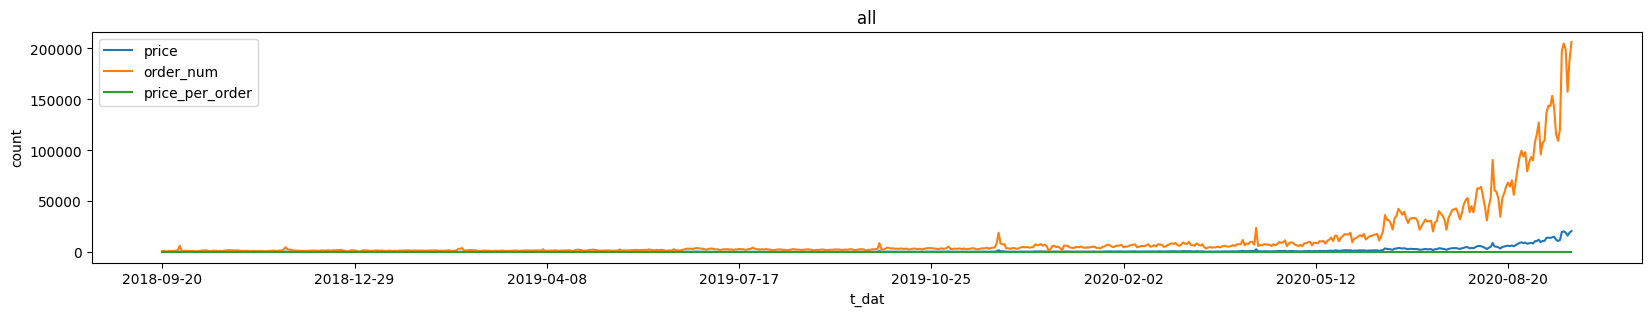

In [154]:
temp = real_transactions.merge(customers, on='customer_id', how='left')
agg_dict = {
    'price': 'sum',
    'order_num': 'sum'
}
temp_price = temp.groupby(['t_dat']).agg(agg_dict)
temp_price['price_per_order'] =  temp_price.price / temp_price.order_num
temp_price.plot(figsize=(20,3), title='all', ylabel='count')

<AxesSubplot: title={'center': 'price_per_order (all)'}, xlabel='t_dat', ylabel='price'>

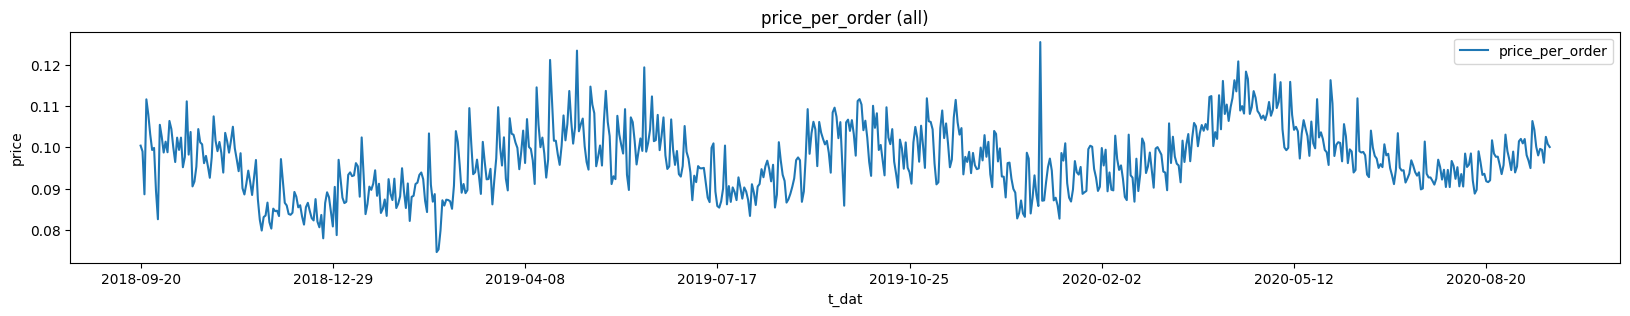

In [155]:
temp_price['price_per_order'].plot(figsize=(20,3), title='price_per_order (all)', ylabel='price', legend=True)

<AxesSubplot: title={'center': 'target'}, xlabel='t_dat', ylabel='count'>

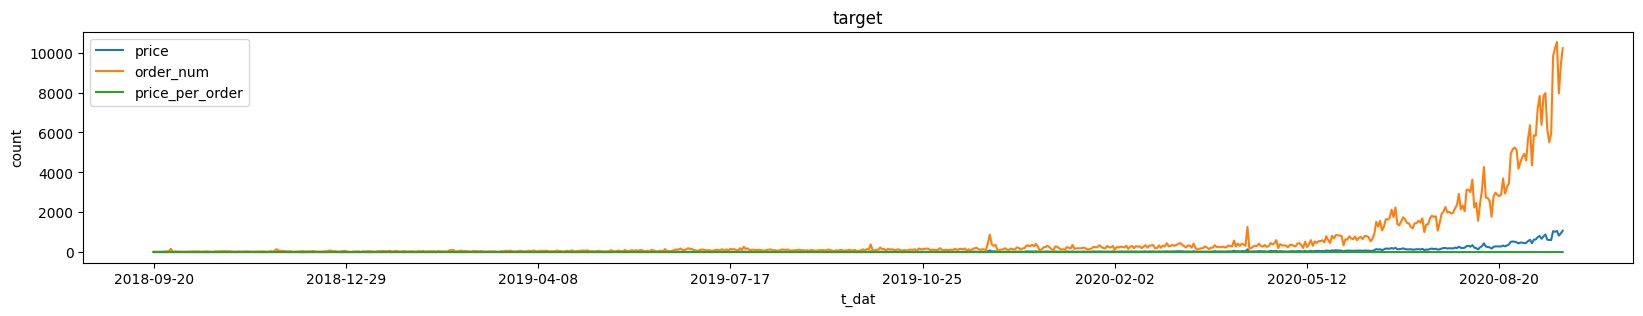

In [156]:
filter1 = temp.age == 25
filter2 = temp.club_member_status == 'ACTIVE'
target = temp.loc[filter1 & filter2]

target_price = target.groupby(['t_dat']).agg(agg_dict)
target_price['price_per_order'] =  target_price.price / target_price.order_num
target_price.plot(figsize=(20,3), title='target', ylabel='count')

<AxesSubplot: title={'center': 'price_per_order (target)'}, xlabel='t_dat', ylabel='price'>

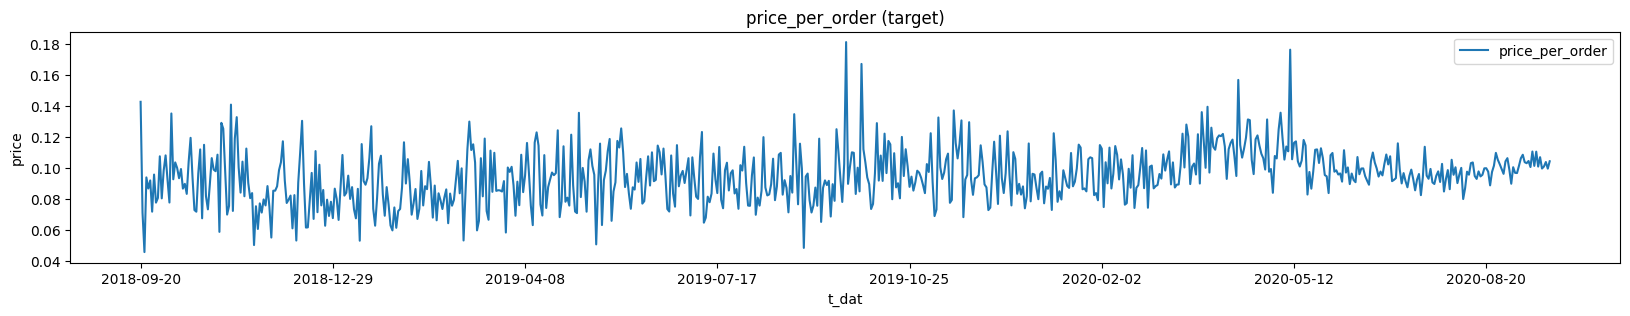

In [157]:
target_price['price_per_order'].plot(figsize=(20,3), title='price_per_order (target)', ylabel='price', legend=True)

### 更進一步分析在暴增的訂單量中，又是哪些 product_type_name 更常被購買。這邊一樣分為全體和  Target 來分析，分別找出這次交易資料區間內最常被購買的 product_type_name 前 20 名來分析。

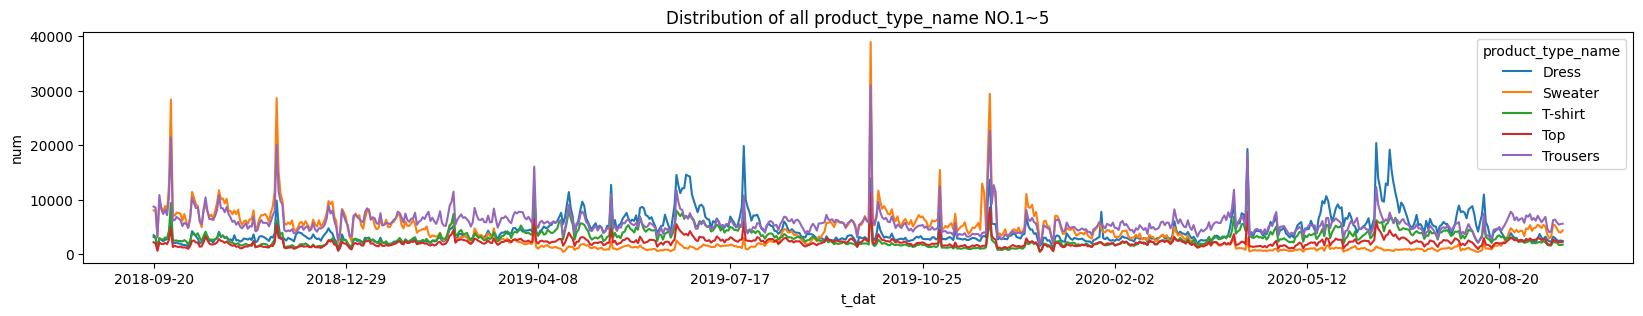

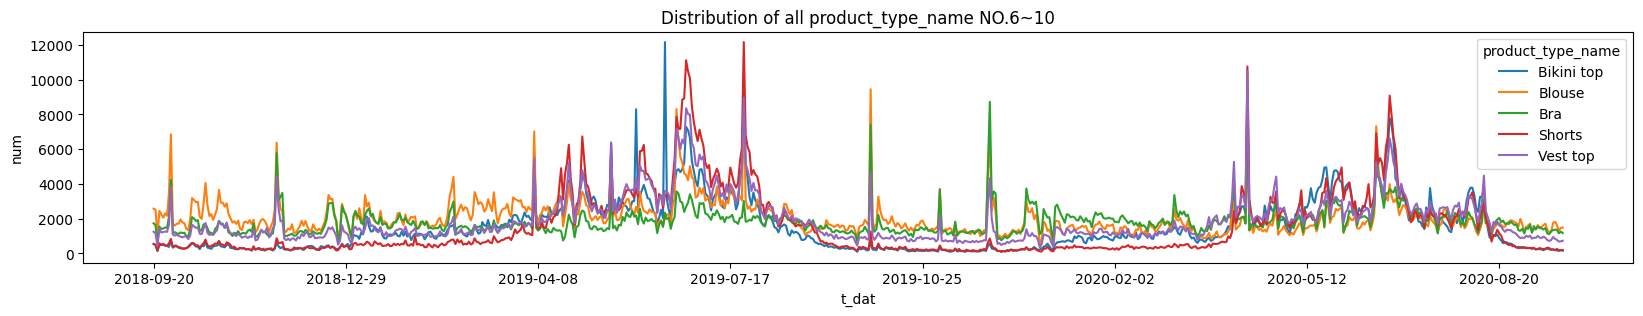

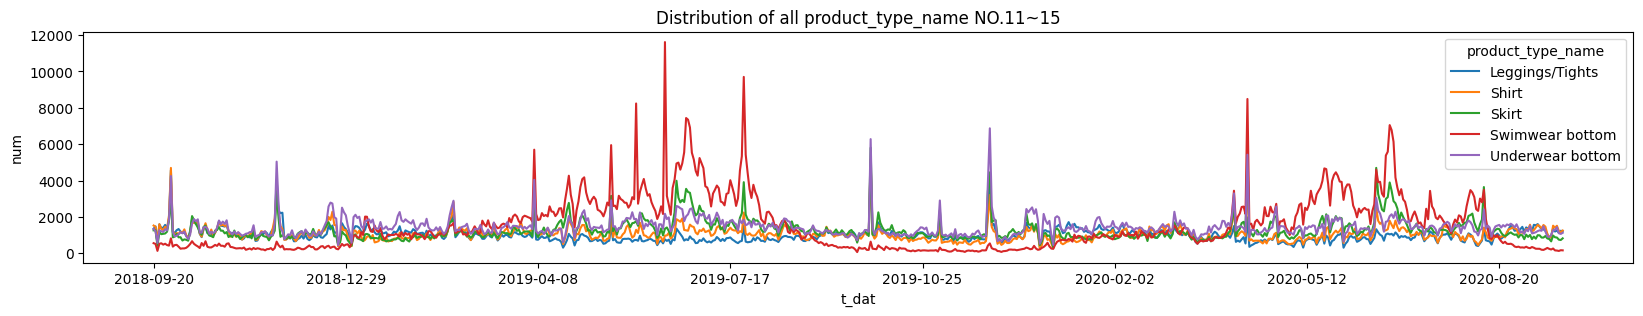

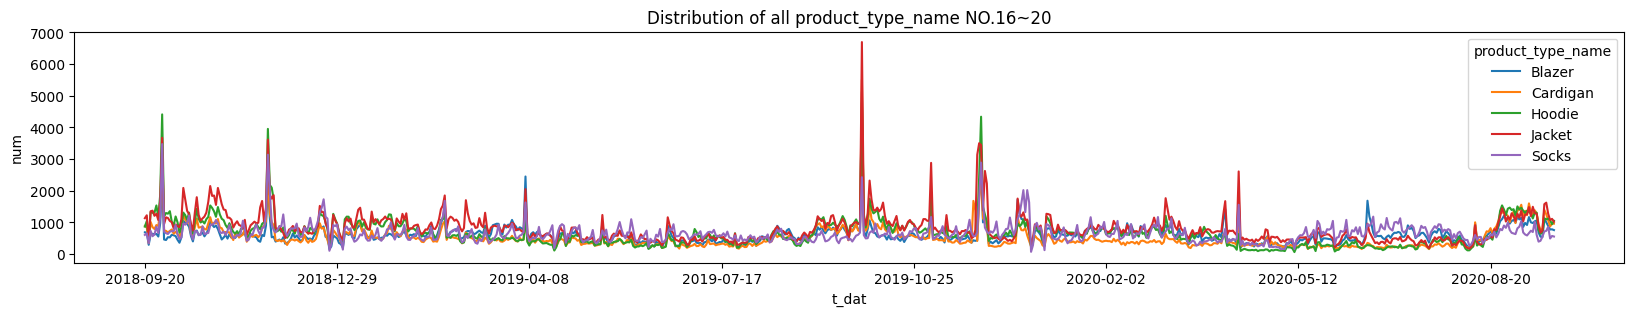

In [158]:
i = 0

while(i < 16):

    top20_prod_type_list = merged2['product_type_name'].value_counts()[i:i+5].index.tolist()
    top20_prod_type = merged2[merged2.product_type_name.isin(top20_prod_type_list)]
    top20_prod_type.groupby(['t_dat', 'product_type_name']).size().unstack().plot(figsize=(20,3), title=f'Distribution of all product_type_name NO.{i+1}~{i+5}', ylabel='num')

    i += 5

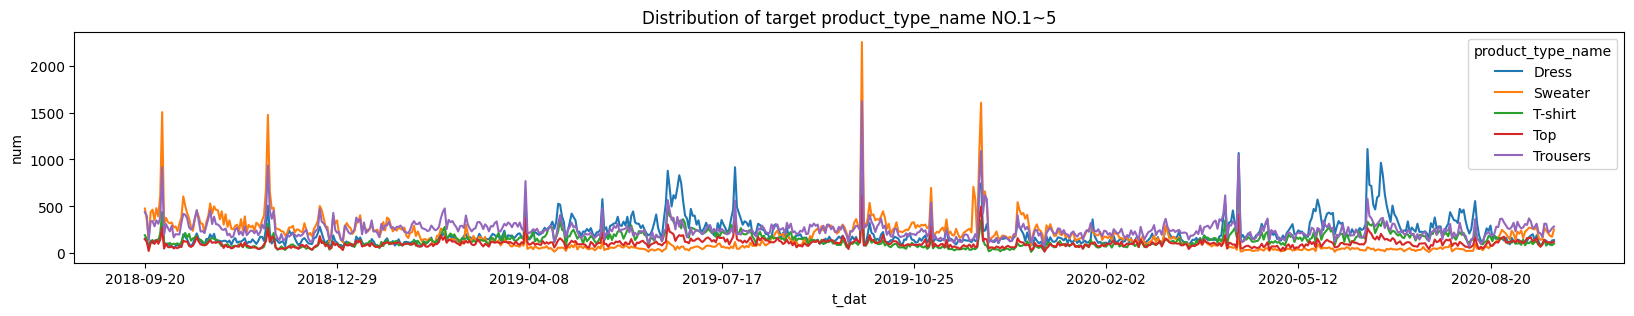

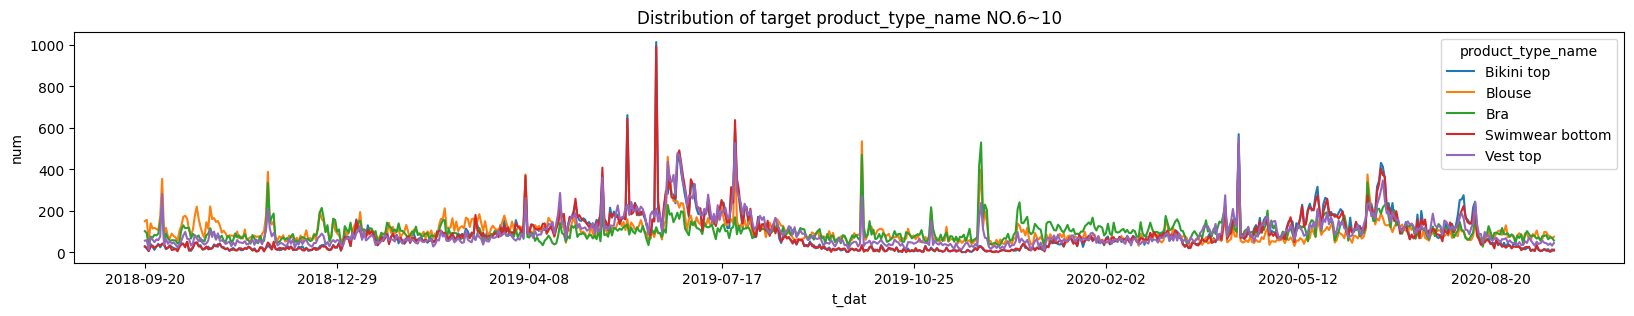

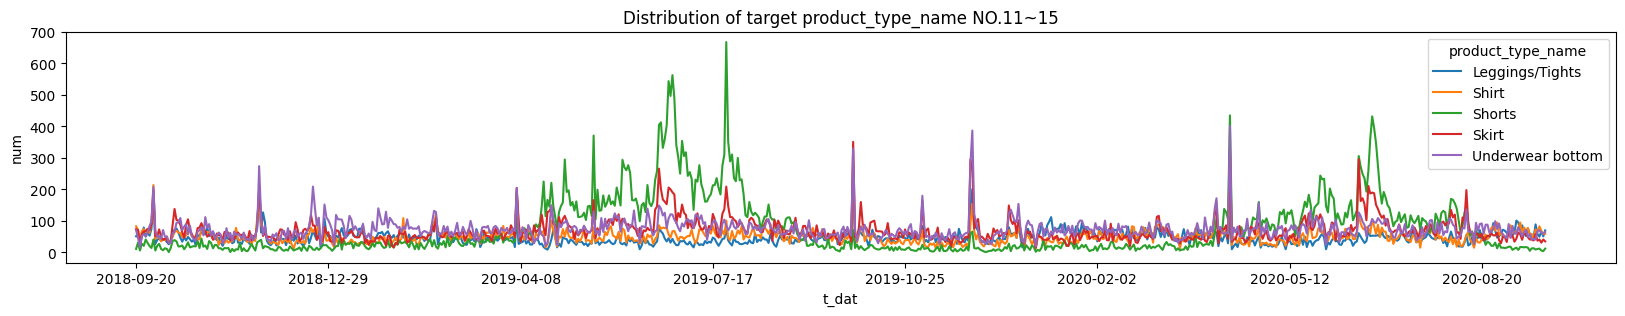

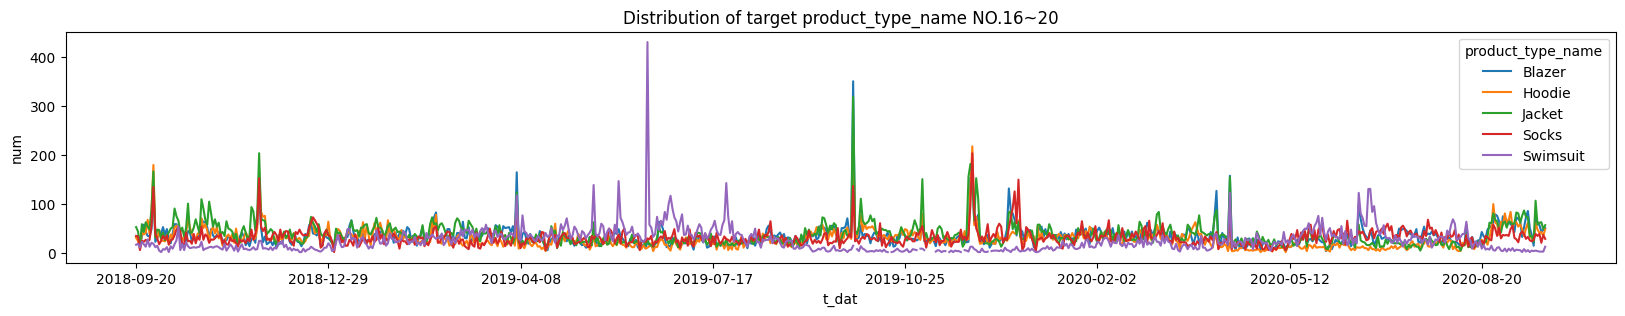

In [159]:
i = 0
filter1 = merged2.age == 25
filter2 = merged2.club_member_status == 'ACTIVE'
target_merged = merged2.loc[filter1 & filter2]

while(i < 16):

    top20_prod_type_list = target_merged['product_type_name'].value_counts()[i:i+5].index.tolist()
    top20_prod_type = target_merged[target_merged.product_type_name.isin(top20_prod_type_list)]
    top20_prod_type.groupby(['t_dat', 'product_type_name']).size().unstack().plot(figsize=(20,3), title=f'Distribution of target product_type_name NO.{i+1}~{i+5}', ylabel='num')

    i += 5